# The Untitled Obesity Project (USA) 

**GROUP MEMBERS:
[Samantha Hong Hui Lee, Yap June Lin Isabel, Low Mingyi Dilys]**

## _I. Executive Summary_

### Introduction
With its generous portions and relatively cheap pricing, we are seeing a rise in fast food chains in America. There is a common assumption that poorer people in America consume more fast food because of its hefty portions for a cheap price, thereby leading to another assumption that poorer people tend to be more obese. 

### Method and Hypotheses
We would like to explore these assumptions by conducting correlational and regression analyses based on the following hypotheses:
1. The number of fast food chains in a given area is positively correlated with obesity rates.
2. Obesity rates are positively correlated with poverty rates.

**Note: The abovementioned hypotheses are only correlational, meaning causation cannot be derived. In other words, we cannot determine the direction of the observed relationships.**

We also ran additional supplementary analyses by regressing obesity against other demographic variables such as age, race and amount of exercise.

### Discussion
We have found that the number of fast food chains in a given area is quite strongly correlated with obesity rates, which means that the more fast food chains there are in an area, the higher the number of obesity cases. We also found that obesity is highly negatively correlated with amount of exercise, and positively correlated with being 65 and under, and is especially high among people 19 and under. There is also a high correlation between poverty rates and the number of fast food chains in a given area.

However, while our regression models show a positive relationship between obesity and fast food chains, and obesity and poverty, there is still variation in obesity which is not accounted for. Hence, there is room for future research to develop better regression models that account for more factors, such as lifestyle preferences, dietary preferences, and income.

-------------------------------------------------------------------------------------------------------------------------------

## _II. Problem Statement & Dataset_

### Research topic
The relationship between fast food consumption, health outcomes and poverty rate in America.

### Why this topic is interesting to us
Fast food provides cheap and readily available food choices. However, the popularisation of fast food restaurants have changed our eating habits such that we are now accustomed to eating sugary and fried food, and food with high sodium content, which can have drastic impacts on our health. It is also commonly assumed that poorer people consume more fast food, which leads to high obesity rates among those of lower socioeconomic status. This creates a vicious cycle of low socioeconomic status and poor nutrition. Thus, we want to find out if these assumptions can be supported by data.

### Dataset Description
We obtained following three datasets on America that contain state-level statistics.
1. Fast food restaurant data from 2014-2018
    - We used `'datafinite.csv'` taken from Kaggle. Link: https://www.kaggle.com/datafiniti/fast-food-restaurants
2. Health data (obesity) in 2018
    - We used `'RISKFACTORSANDACCESSTOCARE.csv'` taken from US data.gov. Link:https://catalog.data.gov/dataset/community-health-status-indicators-chsi-to-combat-obesity-heart-disease-and-cancer
3. Poverty statistics from 2015-2017
    - We used `'DEMOGRAPHICS.csv'` taken from the US data.gov. Link:https://catalog.data.gov/dataset/community-health-status-indicators-chsi-to-combat-obesity-heart-disease-and-cancer
    
-------------------------------------------------------------------------------------------------------------------------------

## _III. Data Cleaning_

### Aims
- Isolate important factors critical for regression analysis
- Combine all the factors into one dataframe categorised by state

#### 1. Import necessary packages to run dataframe and regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#### 2. Generate fast food data frame from `Datafiniti_Fast_Food_Restaurants.csv`

(a) Remove unwanted information contained in the list titled useless

(b) Generate a new dataframe named `num_of_chains_df` to obtain the number of fast food chains per province. Use groupby.() and size() to count the number of fast food restaurants

In [3]:
fast_food_df = pd.read_csv ("Datafiniti_Fast_Food_Restaurants.csv")
useless = ["id","dateAdded","dateUpdated","country","keys","postalCode","sourceURLs","websites"]
fast_food_df = fast_food_df.drop(columns = useless)
fast_food_df.rename(columns = {"province": "state"},inplace=True)
fast_food_df

num_of_chains_df = fast_food_df.groupby ("state").size().reset_index()
num_of_chains_df.columns = ['state', 'num_of_chains']
num_of_chains_df.head(10)

,state,num_of_chains
0,AK,16
1,AL,6
2,AR,102
3,AZ,330
4,CA,1201
5,CO,148
6,CT,53
7,DE,44
8,FL,621
9,GA,420


####  3. Generate poverty, race and age data from `DEMOGRAPHICS.csv`

Raw Data:
- population size in numbers
- poverty, age and race are in %

(a) Extract out factors that will be used for regression and store them into a list named factors. Factors include, province, city, population size, age and race. 

In [4]:
# (a) extract useful info

demographics_df = pd.read_csv ("DEMOGRAPHICS.csv")
factors = ["CHSI_County_Name","CHSI_State_Abbr","Population_Size", "Poverty",
          "Age_19_Under", "Age_19_64","Age_65_84","Age_85_and_Over","White","Black","Asian","Hispanic"]

demographics_df = demographics_df[factors]
demographics_df.rename(columns = {"CHSI_County_Name": "city","CHSI_State_Abbr":"state"},inplace=True)
demographics_df.head()

,city,state,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,Black,Asian,Hispanic
0,Autauga,AL,48612,10.4,26.9,62.3,9.8,0.9,80.7,17.3,0.6,1.7
1,Baldwin,AL,162586,10.2,23.5,60.3,14.5,1.8,88.4,9.9,0.4,2.3
2,Barbour,AL,28414,22.1,24.3,62.5,11.6,1.6,52.2,46.8,0.3,3.1
3,Bibb,AL,21516,16.8,24.6,63.3,10.9,1.2,76.8,22.5,0.1,1.4
4,Blount,AL,55725,11.9,24.5,62.1,12.1,1.3,97.1,1.5,0.2,6.3


#### 4. Generate Risk Factor Data by State from RISKFACTORSANDACCESSTOCARE.csv

(a) Extract risk factors that are critical for analysis. Factors include: obesity (%), smoker (%) and no exericse (%). 

(b) Convert the percentages to decimals. Values denoted -1111.1 are converted to 0

(b) use df.merge() to combine `demographics_by_state_df` data with this data and convert risk factors into numbers based on population size. 

In [5]:
df3 = pd.read_csv ("RISKFACTORSANDACCESSTOCARE.csv")
useful_risk = ["CHSI_County_Name","CHSI_State_Abbr","No_Exercise","Obesity"]

# (a) Convert % to decimals and negative value to 0

risk_factors_df = df3 [useful_risk]
risk_factors_df.rename(columns = {"CHSI_County_Name": "city","CHSI_State_Abbr":"state"},inplace=True)

risk_factors_df["Obesity"] = risk_factors_df["Obesity"].apply(lambda x: max(x, 0))
risk_factors_df["No_Exercise"] = risk_factors_df["No_Exercise"].apply(lambda x: max(x, 0))

risk_factors_df.head()

C:\Users\Dilys\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\Dilys\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Dilys\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

,city,state,No_Exercise,Obesity
0,Autauga,AL,27.8,24.5
1,Baldwin,AL,27.2,23.6
2,Barbour,AL,0.0,25.6
3,Bibb,AL,0.0,0.0
4,Blount,AL,33.5,24.2


#### 5. Merge the three dataframes to a new df called combined_df

(a) Merge `demographics_df` and `risk_factors_df` to give `risk_demo_df`. Then, converted percentages into absolute numbers by multiplying with state population sizes. 

(b) Sum the respective categories based on state using groupby.( ) and .sum ( ).

(c) Merge `risk_demo_df` with `num_of_chains_df` to get all the relevant factors and variables within the same dataframe.


**NOTE**
- Data obesity and exercise were not available for state AK,and was removed from the dataframe to reduce error in regression later
- Certain cities had no exercise and obesity data, thus, total number of people who doesnt exercise and/or obese within each state is an underestimation of the actual value

In [6]:
# (a) Merge demographics and risk_factros together

risk_demo_df = demographics_df.merge(risk_factors_df, on = ("city","state"))
risk_demo_df.head()

size = risk_demo_df ["Population_Size"]
factors_in_percen = ["Poverty","Age_19_Under", "Age_19_64","Age_65_84","Age_85_and_Over",
                   "White","Black","Asian","Hispanic", "No_Exercise","Obesity"]

risk_demo_df [factors_in_percen] = risk_demo_df [factors_in_percen].apply(lambda x: x/100)
risk_demo_df [factors_in_percen] = risk_demo_df[factors_in_percen].apply(lambda x: x *size)
risk_demo_df.round().head(50)

# (b) sum each category by state

risk_demo_by_state_df = risk_demo_df.groupby("state").sum().reset_index()
risk_demo_by_state_df.round().head()

# (c) Merge risk_demo_by_state with num_of_chains_df

combined_df = num_of_chains_df.merge(risk_demo_by_state_df, on = ("state"))
combined_df = combined_df.drop ([0]).round()
combined_df.head()

,state,num_of_chains,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,Black,Asian,Hispanic,No_Exercise,Obesity
1,AL,6,4557808,694295.0,1153972.0,2800757.0,535624.0,67869.0,3253115.0,1202771.0,39703.0,103572.0,1172941.0,1061478.0
2,AR,102,2779154,445173.0,714935.0,1679779.0,336099.0,48514.0,2260452.0,436889.0,29337.0,129152.0,754197.0,665322.0
3,AZ,330,5939292,825628.0,1657401.0,3522749.0,668126.0,90996.0,5188800.0,214334.0,143999.0,1674692.0,1383998.0,1220232.0
4,CA,1201,36132147,4975547.0,10182509.0,22078795.0,3327179.0,544401.0,27824416.0,2437829.0,4568814.0,12565386.0,8395554.0,7334471.0
5,CO,148,4665177,466422.0,1242508.0,2957637.0,404867.0,59947.0,4210837.0,190733.0,126607.0,892807.0,797460.0,742890.0


<hr>

## IV. Data Analysis

**In this section, we utilize correlation and regressions to investigate our hypotheses.**


### A. CORRELATION

### (1) Data Visualiation Using A Heat Map

We plot a heat map to visualise the correlation of the variables of interest (namely `Obesity`, `num_of_chains` and `Poverty`), and other factors like `Age Groups`,  `Race` and  `No_Exercise` will be included. The heat map uses darker shades of red to represent a strong correlation between variables (close to 1) and darker shades of blue to represent a weaker correlation (close to 0.5).

With the heat map shown below, we can observe the following points on obesity:
- Obesity is more prominent amongst those who **do not exercise, people 65 and below and whites.**
- Obesity is also highly correlated with the number of the fast food chains and the number of people living in poverty in each state. 

Text(0.5, 1.0, 'Correlation Between Variables')

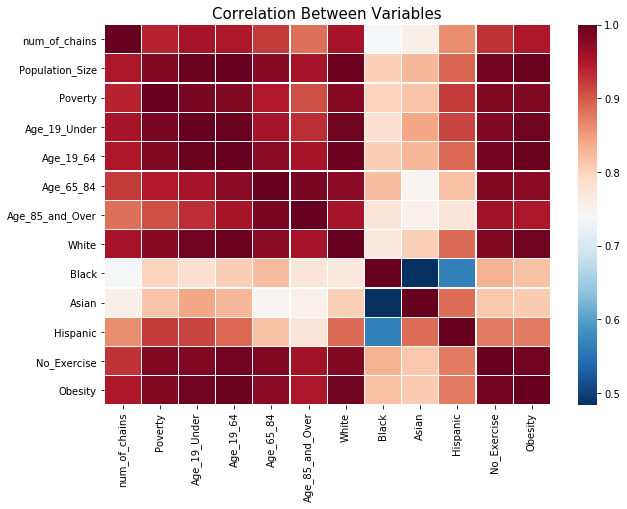

In [16]:
corelation_df = combined_df.corr()
corelation_df =corelation_df.drop(columns = "Population_Size")

plt.figure(figsize=(10, 7))
ax = sns.heatmap(corelation_df, linewidth=0.3, cmap='RdBu_r')
ax.set_title ("Correlation Between Variables", fontsize = 15)

### **(2) Understanding the relationship between Obesity, Number of Fast Food Chains & Poverty** 

As mentioned earlier, our key variables of interest are `Obesity`, `num_of_chains` and `Poverty`, which were shown to be highly correlated. Therefore, we graphed a scatter plot to illustrate the relationship between the variables of interest.  

0.950598819489174
0.9398610442786424
0.9819867480945557


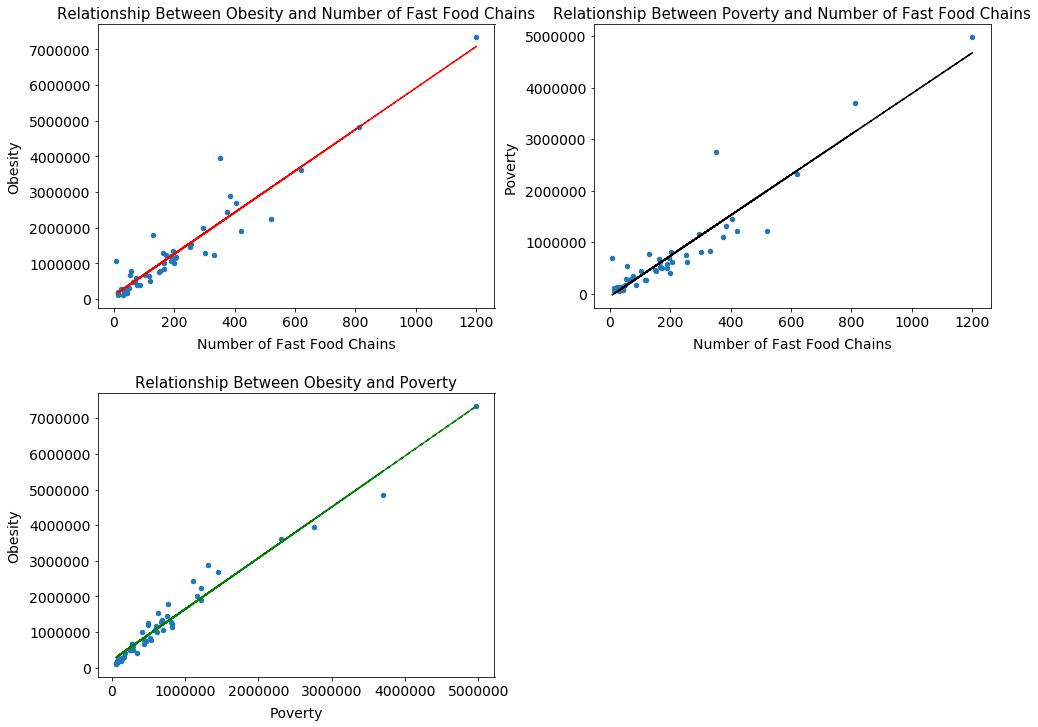

In [7]:
DIMS = (16,12)
fig = plt.figure(figsize= DIMS)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

# Dependent and independent variables:
x1 = combined_df ["num_of_chains"]
x2 = combined_df ["Poverty"]
y1 = combined_df ["Obesity"]

# Plot 1: Relationship Between Obesity and Number of Fast Food Chains:
combined_df.plot(kind='scatter', 
                x='num_of_chains', y='Obesity',
                ax = ax1,
                fontsize = 14)

z = np.polyfit(x1,y1,1)
p = np.poly1d(z)
ax1.plot(x1,p(x1),"r--")

ax1.set_ylabel("Obesity", Fontsize = 14, labelpad = 8)
ax1.set_xlabel("Number of Fast Food Chains", Fontsize = 14, labelpad = 8)
ax1.set_title ("Relationship Between Obesity and Number of Fast Food Chains", fontsize = 15)

# Plot 2: Relationship between Poverty and Number of Fast Food Chains:
combined_df.plot(kind='scatter', 
                x='num_of_chains', y='Poverty',
                ax = ax2,
                fontsize = 14)

z = np.polyfit(x1,x2,1)
p = np.poly1d(z)
ax2.plot(x1,p(x1),"k--")

ax2.set_ylabel("Poverty", Fontsize = 14, labelpad = 8)
ax2.set_xlabel("Number of Fast Food Chains", Fontsize = 14, labelpad = 8)
ax2.set_title ("Relationship Between Poverty and Number of Fast Food Chains", fontsize = 15)

# Plot 3: Relationship Between Obesity and Poverty
combined_df.plot(kind='scatter', 
                x='Poverty', y='Obesity',
                ax = ax3,
                fontsize = 14)

z = np.polyfit(x2,y1,1)
p = np.poly1d(z)
ax3.plot(x2,p(x2),"g--")

ax3.set_ylabel("Obesity", Fontsize = 14, labelpad = 8)
ax3.set_xlabel("Poverty", Fontsize = 14, labelpad = 8)
ax3.set_title ("Relationship Between Obesity and Poverty", fontsize = 15)

plt.subplots_adjust(hspace = 0.3, wspace= 0.25)

# Co-relation values between the two graphs respectively 
print(y1.corr(x1))
print(x2.corr(x1))
print(y1.corr(x2))

**Results** 

The correlation value between `Obesity` and `Poverty` (0.981) is slightly higher than that between `Obesity` and `num_of_chains` (0.951). Socio-economic status may play a critical role in food options as the less well-off may have lesser food choices and opt for cheaper and more convenient options like fast food.

<hr>

### B. LINEAR REGRESSION

- **Converted all values to percentages in each state.**

In [11]:
size = combined_df ["Population_Size"]
factors_of_interest = ["Poverty","Age_19_Under", "Age_19_64","Age_65_84","Age_85_and_Over",
                   "White","Black","Asian","Hispanic", "No_Exercise","Obesity"]

combined_df [factors_of_interest] = combined_df [factors_of_interest].apply(lambda x: x/size)
combined_df [factors_of_interest] = combined_df[factors_of_interest].apply(lambda x: x *100)

combined_df.head()

,state,num_of_chains,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,Black,Asian,Hispanic,No_Exercise,Obesity
1,AL,6,4557808,15.233090,25.318574,61.449649,11.751789,1.489071,71.374551,26.389242,0.871099,2.272408,25.734761,23.289221
2,AR,102,2779154,16.018292,25.724915,60.442099,12.093572,1.745639,81.335975,15.720216,1.055609,4.647170,27.137647,23.939731
3,AZ,330,5939292,13.901118,27.905700,59.312608,11.249253,1.532102,87.363948,3.608747,2.424515,28.196829,23.302407,20.545075
4,CA,1201,36132147,13.770416,28.181301,61.105682,9.208362,1.506694,77.007370,6.746981,12.644734,34.776195,23.235691,20.299018
5,CO,148,4665177,9.997949,26.633673,63.398173,8.678492,1.284989,90.261034,4.088441,2.713873,19.137688,17.093885,15.924155


### (1) Regression of _Obesity_ on _Number of Fast Food Chains_ & _Poverty Rates_ in each state

In [28]:
factors = ["Poverty","num_of_chains"]

X3 = combined_df [factors]
y3 = combined_df['Obesity']
model_chains_poverty = sm.OLS(y3, X3)
result_chains_poverty = model_chains_poverty.fit()

result_chains_poverty.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Obesity   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     1213.
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           3.57e-41
Time:                        23:01:26   Log-Likelihood:                -679.85
No. Observations:                  49   AIC:                             1364.
Df Residuals:                      47   BIC:                             1367.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Poverty           1.0659      0.118      9.043      0.000       0.829       1.303
num_of_chains  1965.6519    467.426      4.205      0.000    1025.313    2905.991
==============================================================================
Omnibus:                        6.134   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                9.282
Skew:                           0.061   Prob(JB):                      0.00965
Kurtosis:                       5.129   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Result 1:**

The positive coefficients from the regression indicate that higher poverty rates and a greater number of fast food chains in each state are associated with higher obesity rates, and this is statistically significant at the 1% level.

This result is in line with our hypothesis that poorer individuals have poorer nutrition due to limited food options and hence are more likely to be obese. Additionally, a higher proportion of fast food chains would naturally be associated with higher obesity rates, due to the relatively unhealthy menus carried by fast food chains. This regression has a R-squared value of 0.981 which indicates a fairly good fit of the data.

<hr>

### (2) Regression of _Obesity_ on _Number of Fast Food Chains_ & _Poverty Rates_ in each state, with additional control variables

Apart from the number of fast food chains and poverty rates, we believe that **other factors like age, race and the lack of exercise can affect obesity rates in each state**. Therefore, we include these factors into the regression earlier on to isolate the effects of fast food chains and poverty rates on obesity.

In [29]:
combined_df['Age_65_and_Over'] = combined_df['Age_65_84'] + combined_df['Age_85_and_Over']
all_factors = ["Poverty","num_of_chains", "Age_19_64","Age_65_and_Over", "White", "Black", "Asian" ,"Hispanic", "No_Exercise"]

X4 = combined_df [all_factors]
y = combined_df['Obesity']
model_all_factors = sm.OLS(y, X4)
result_all_factors = model_all_factors.fit()

result_all_factors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Obesity   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2014.
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           3.18e-50
Time:                        23:01:35   Log-Likelihood:                -627.05
No. Observations:                  49   AIC:                             1272.
Df Residuals:                      40   BIC:                             1289.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Poverty             0.2583      0.169      1.529      0.134      -0.083       0.600
num_of_chains     332.0599    235.015      1.413      0.165    -142.922     807.042
Age_19_64          -0.3064      0.231     -1.326      0.192      -0.774       0.161
Age_65_and_Over    -0.3818      0.150     -2.553      0.015      -0.684      -0.080
White               0.3793      0.154      2.467      0.018       0.069       0.690
Black               0.2867      0.145      1.971      0.056      -0.007       0.581
Asian               0.4131      0.211      1.956      0.057      -0.014       0.840
Hispanic           -0.1172      0.039     -3.001      0.005      -0.196      -0.038
No_Exercise         0.2618      0.116      2.263      0.029       0.028       0.496
==============================================================================
Omnibus:                        5.654   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                6.395
Skew:                          -0.312   Prob(JB):                       0.0409
Kurtosis:                       4.657   Cond. No.                     1.63e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Result 2:**

Similar to the Result 1, poverty rates and the number of fast food chains have positive coefficients, indicating that higher values of them are associated with higher obesity rates. However, these coefficients are not statistically significant, even up till the 10% level. This suggests that variations in obesity rates cannot be explained using poverty rates and number of fast food chains only. Hence, it is possible that there are factors not accounted for in our model, such as income level, other health outcomes like diabetes, and lifestyle preferences.

A higher proportion of older individuals (aged 65 and above) are associated with lower obesity rates, and this result is statistically significant at the 5% level. Since younger people tend to eat out more often and patronise fast food chains, it makes sense that a lower obesity rate would be associated with a lower proportion of young people (aka a greater proportion of old people). Racial factors also appear to be positively and statistically associated with obesity rates, except for hispanics which have a negative association. Lastly, a greater proportion of individuals who don't exercise are also associatd with higher obesity rates, which is statistically significant at the 5% level. Individuals who don't exercise would likely be more susceptible to obesity.

This regression model has a R-squared value of 0.998 which indicates a fairly good fit of the data, and an improvement from the previous model.

<hr>

### (3) Regression of _Obesity_ on _Number of Fast Food Chains_ & _Poverty Rates_ in each state, with additional control variables and interaction terms

We included interaction terms to observe the **heterogeneous effects** of poverty across different races and age groups on obesity rates.

In [32]:
combined_df['Age_65_and_Over'] = combined_df['Age_65_84'] + combined_df['Age_85_and_Over']

# interaction terms:
combined_df['poverty_age_19'] = combined_df['Poverty']*combined_df['Age_19_64']
combined_df['poverty_age_65'] = combined_df['Poverty']*combined_df['Age_65_and_Over']
combined_df['poverty_white'] = combined_df['Poverty']*combined_df['White']
combined_df['poverty_black'] = combined_df['Poverty']*combined_df['Black']
combined_df['poverty_asian'] = combined_df['Poverty']*combined_df['Asian']
combined_df['poverty_hispanic'] = combined_df['Poverty']*combined_df['Hispanic']

all_factors = ["Poverty","num_of_chains", "Age_19_64","Age_65_and_Over", "White", "Black", "Asian" ,"Hispanic", "No_Exercise",
              'poverty_age_19', 'poverty_age_65', 'poverty_white', 'poverty_black', 'poverty_asian', 'poverty_hispanic']

X5 = combined_df [all_factors]
y = combined_df['Obesity']
model_all_factors = sm.OLS(y, X5)
result_all_factors = model_all_factors.fit()

result_all_factors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Obesity   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     810.2
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           1.20e-38
Time:                        23:05:16   Log-Likelihood:                -618.73
No. Observations:                  49   AIC:                             1267.
Df Residuals:                      34   BIC:                             1296.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Poverty              0.2952      0.213      1.388      0.174      -0.137       0.728
num_of_chains      -56.9255    281.305     -0.202      0.841    -628.605     514.754
Age_19_64            0.0684      0.501      0.136      0.892      -0.950       1.087
Age_65_and_Over      0.1529      0.512      0.298      0.767      -0.888       1.194
White                0.0664      0.328      0.203      0.841      -0.599       0.732
Black                0.1227      0.343      0.357      0.723      -0.575       0.821
Asian                0.0445      0.457      0.097      0.923      -0.884       0.973
Hispanic            -0.1024      0.068     -1.495      0.144      -0.242       0.037
No_Exercise          0.2737      0.130      2.101      0.043       0.009       0.538
poverty_age_19   -1.504e-07    6.3e-07     -0.239      0.813   -1.43e-06    1.13e-06
poverty_age_65   -2.001e-07   3.21e-07     -0.624      0.537   -8.52e-07    4.52e-07
poverty_white     1.355e-07   4.22e-07      0.321      0.750   -7.22e-07    9.93e-07
poverty_black      1.47e-08   4.64e-07      0.032      0.975   -9.28e-07    9.57e-07
poverty_asian     1.122e-07   5.59e-07      0.201      0.842   -1.02e-06    1.25e-06
poverty_hispanic -1.027e-08    5.5e-08     -0.187      0.853   -1.22e-07    1.02e-07
==============================================================================
Omnibus:                        9.650   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               20.615
Skew:                          -0.286   Prob(JB):                     3.34e-05
Kurtosis:                       6.126   Cond. No.                     7.16e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.16e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Result 3:**

While the R-squared value of 0.997 suggests a good model fit, the coefficients for all variables are not statistically significant at the 10% level. This may be because our dataset contains state-level values, and not individual-level values. State-level data only reflects the proportion of individuals with characteristics of interest (race, age etc), but individual-level data will be able to capture the relationship between race, age, poverty and obesity more clearly and accurately.

Since the inclusion of interaction terms does not add value to our understanding of obesity, fast food chains and poverty, we believe that Regression 2's model is the most suitable to use.

<hr>

## _V. Conclusion_

#### 1. What insights have we uncovered from the analysis? Do they support our initial hypotheses?

Re-iterating our hypotheses:
- The number of fast food chains in a given area is positively correlated with obesity rates. (R-value: 0.951)
- Obesity rates are positively correlated with poverty rates. (R-value: 0.940)

Insights:
- Possible that fast food chains set up branches in poorer districts to provide cheaper food alternatives to people (or poorer people patronise fast food chains more) but this is then related to higher obesity rates. 
- Obesity is strongly correlated with being of ages 19-65 years old and not exercising.
    - The dataset we obtained specified a rather large range for age (19-65 y/o) so it is difficult to draw any conclusions from the results of our analyses.
    - Intuitively, not exercising is strongly related to obesity. It could be that obese people tend to avoid exercise because it is tougher on their bodies or that people who don't exercise tend to develop obesity.
    - Obesity could be correlated with poverty because it is difficult to access well-balanced, healthy food.
    
#### 2. What were the discussion points that surfaced after completing this project?

- The advent of fast food chains could cause an increase in obesity rates.
- It is also possible that fast food chains set up business in areas where it seems like more people will patronise them.
- Obesity being correlated with poverty could suggest to government interventions to target poorer districts.

#### 3. What other possible future research efforts can be performed by extending our project?

Limitations:
- Using individual-level data would allow a better analysis of the relationship between race, age, poverty and obesity.
- Our regression models did not include state-level fixed effects, whereby factors such as income, education health programs, lifestyle preferences would vary across different states. 
    
Future research:
- A more ideal research design would be to conduct a natural experiment whereby researchers follow individuals before and after the opening of a fast food chain, observing and collecting comprehensive individual-level data such as varied health outcomes, income, demographic information, etc. This would enable researchers to control for any existing behaviours of individuals and isolate the effects of fast food chains on obesity rates.
    
Extensions:
- Analyse if food delivery services from fast food chains result in higher obesity rates.
- Analyse size portions that fast food chains offer and see if it correlates with obesity.